# Importing Data in Python (Part 2)
- William Surles
- 2017-10-22
- Datacamp course notes
- [https://www.datacamp.com/courses/importing-data-in-python-part-2](https://www.datacamp.com/courses/importing-data-in-python-part-2)

## Whats Covered
- Importing data from the internet
 - Importing flat files from the web
 - HTTP requests to import files from the web
 - Sraping the web in Python
- Interacting with APIs to import data from the web
 - Introduction to APIs and JSONs
 - APIs and interacting with the world wide web
- Diving deep into the twitter API
 - The Twitter API and Authentication

## Additional Resources

- [Objectooriented programming in python](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/)

## Libraries and data

In [167]:
import json
import os
import tweepy
import seaborn as sns
import matplotlib.pyplot as plt
import re


# Importing data from the Internet

## Importing flat files from the web

#### You learn to...
- Import and locally save datasets from the web
- Load datasets into pandas DataFrames
- make HTTP requests (GET requests)
- Scrape web data such as HTML
- Parse HTML into useful data (BeautifulSoup)
- Use the urllib and requests packages

#### The urllib package
- Provides interface for fetching data acros the web
- `urlopen()` - accepts URLs instead of file names

In [2]:
from urllib.request import urlretrieve
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
urlretrieve(url, 'winequality-white.csv')

('winequality-white.csv', <http.client.HTTPMessage at 0x10b3b7390>)

### Importing flat files from the web: your turn!

In [3]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, 'winequality-red.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### Opening and reading flat files from the web

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

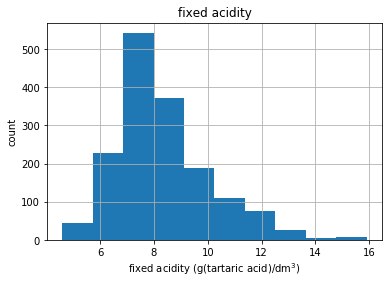

In [5]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, sep=';')

# Print the head of the DataFrame
print(df.head())

# Plot first column of df
pd.DataFrame.hist(df.iloc[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()


### Importing non-flat files from the web

In [6]:
# Import package
import pandas as pd

# Assign url of file: url
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xl
xl = pd.read_excel(url, sheetname=None)

# Print the sheetnames to the shell
print(xl.keys())

# Print the head of the first sheet (using its name, NOT its index)
print(xl['1700'].head())


odict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


## HTTP requests to import files from the web

#### URL
- Uniform/Universal Resource Locator
- references to web resources
 - Could be a website, an api, or a database
- Focus for this class on web addresss
- Ingredients:
 - Protocol identifier - http:
 - Resource name - datacamp.com
- These specify web addresses uniquely

#### HTTP
- HyperText Transfer Protocol
- Foundation of data communication for the web 
 - read wiki site for more info and background
- HTTPS - more secure form of HTTP
- Going to a website = sending HTTP request
 - GET request
- urlretrieve() performs a GET request
- HTML - HyperText Markup Language

#### GET requests using urllib

In [25]:
from urllib.request import urlopen, Request
url = "https://www.wikipedia.org/"
request = Request(url)
response = urlopen(request)
html = response.read()
response.close()
html[0:500]

b'<!DOCTYPE html>\n<html lang="mul" class="no-js">\n<head>\n<meta charset="utf-8">\n<title>Wikipedia</title>\n<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">\n<![if gt IE 7]>\n<script>\ndocument.documentElement.className = document.documentElement.className.replace( /(^|\\s)no-js(\\s|$)/, "$1js-enabled$2" );\n</script>\n<![endif]>\n<!--[if lt IE 7]><meta http-equiv="imagetoolbar" content="no">'

#### Get request using request
- This is one of the most popular python packages. 

In [26]:
import requests
url = "https://www.wikipedia.org/"
r = requests.get(url)
text = r.text
text[0:500]

'<!DOCTYPE html>\n<html lang="mul" class="no-js">\n<head>\n<meta charset="utf-8">\n<title>Wikipedia</title>\n<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">\n<![if gt IE 7]>\n<script>\ndocument.documentElement.className = document.documentElement.className.replace( /(^|\\s)no-js(\\s|$)/, "$1js-enabled$2" );\n</script>\n<![endif]>\n<!--[if lt IE 7]><meta http-equiv="imagetoolbar" content="no">'

### Performing HTTP requests in Python using urllib

In [18]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request: request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Print the datatype of response
print(type(response))

# Be polite and close the response!
response.close()


<class 'http.client.HTTPResponse'>


### Printing HTTP request results in Python using urllib

In [24]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Extract the response: html
html = response.read()

# Print the html
print(html[:500])

# Be polite and close the response!
response.close()


b'<!DOCTYPE html>\n<html>\n\t<head>\n\n\t\t<link rel="stylesheet" media="all" href="/teach/assets/application-9f12ba0d57351944af51615a03f2adabd8bba1085fe02997bb742232f9592cc3.css" />\n\t\t<link rel="shortcut icon" type="image/x-icon" href="/teach/assets/favicon-335cd0394b32102a39221d79e5fd7e51078e6d32a0c8aea59676a6869f84e9d8.ico" />\n\t\t<meta name="csrf-param" content="authenticity_token" />\n<meta name="csrf-token" content="PXZfXBA9npZdp5B7X/uEdSmuMhMLgKwC6ldW+bjE8E5V7EO+aKJpIug0/WB44UccGnbXaTBAN2FnJZR+emmteQ'


### Performing HTTP requests in Python using requests

In [23]:
# Import package
import requests

# Specify the url: url
url = "http://www.datacamp.com/teach/documentation"

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response: text
text = r.text

# Print the html
print(text[:500])


<!DOCTYPE html>
<html>
	<head>

		<link rel="stylesheet" media="all" href="/teach/assets/application-9f12ba0d57351944af51615a03f2adabd8bba1085fe02997bb742232f9592cc3.css" />
		<link rel="shortcut icon" type="image/x-icon" href="/teach/assets/favicon-335cd0394b32102a39221d79e5fd7e51078e6d32a0c8aea59676a6869f84e9d8.ico" />
		<meta name="csrf-param" content="authenticity_token" />
<meta name="csrf-token" content="KWswu0QCAwv6xMVBlBsP/MXNJRlpOoBTC3shqnqVSZL5762xLiQs+I5bCl8pnL3W5LpqTd1ED23ZPVbzId4ijg


## Scraping the web in Python

#### HTML
- Mix of unstructured and structured data
- Structured data:
 - Has pre-defined data model, or
 - Organized in a defined manner
- Unstructured data: neither of these properties

#### Beautiful Soup
- Parse and extract structured data from HTML
- Soup refers to the tag mess in some html code

In [ ]:
from bs4 import BeautifulSoup
import requests
url = 'https://www.crummy.com/software/BeautifulSoup/'
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc, 'html5lib')

#### Exploring BeautifulSoup

In [41]:
print(soup.prettify()[0:500])

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Beautiful Soup: We called him Tortoise because he taught us.
  </title>
  <link href="mailto:leonardr@segfault.org" rev="made"/>
  <link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
  <meta content="Beautiful Soup: a library designed for screen-scraping HTML and X


In [42]:
print(soup.title)

<title>Beautiful Soup: We called him Tortoise because he taught us.</title>


In [44]:
print(soup.get_text()[:500])



Beautiful Soup: We called him Tortoise because he taught us.









You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.



Beautiful Soup

"A tremendous boon." -- Python411 Podcast

[ Download | Documentation | Hall of Fame | Source | Discussion group  | Zine ]

If Beautiful Soup has saved you a lot of time and money, one wa


In [45]:
for link in soup.find_all('a'):
    print(link.get('href'))

bs4/download/
#Download
bs4/doc/
#HallOfFame
https://code.launchpad.net/beautifulsoup
https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup
zine/
zine/
https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup
https://bugs.launchpad.net/beautifulsoup/
http://lxml.de/
http://code.google.com/p/html5lib/
bs4/doc/
None
None
bs4/download/
http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html
download/3.x/BeautifulSoup-3.2.1.tar.gz
None
None
http://www.nytimes.com/2007/10/25/arts/design/25vide.html
https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py
http://www.harrowell.org.uk/viktormap.html
http://svn.python.org/view/tracker/importer/
http://www2.ljworld.com/
http://www.b-list.org/weblog/2010/nov/02/news-done-broke/
http://esrl.noaa.gov/gsd/fab/
http://laps.noaa.gov/topograbber/
http://groups.google.com/group/beautifulsoup/
https://launchpad.net/beautifulsoup
https://code.launchpad.net/beautifulsoup/
https://bugs.

### Parsing HTML with BeautifulSoup

In [57]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc, 'html5lib')

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup[:500])


<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
  </p>
  <h3>
   <a href="http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000


### Turning a webpage into data using BeautifulSoup: getting the text

In [58]:
# Get the title of Guido's webpage: guido_title
guido_title = soup.title

# Print the title of Guido's webpage to the shell
print(guido_title)

<title>Guido's Personal Home Page</title>


In [59]:
# Get Guido's text: guido_text
guido_text = soup.text

# Print Guido's text to the shell
print(guido_text[:500])


Guido's Personal Home Page






Guido van Rossum - Personal Home Page

"Gawky and proud of it."


Who
I Am

Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.  I
also have
a G+
profile.

In January 2013 I joined
Dropbox.  I 


### Turning a webpage into data using BeautifulSoup: getting the hyperlinks

In [60]:
# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all('a')

# Print the URLs to the shell
for link in a_tags:
    print(link.get('href'))


pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
https://plus.google.com/u/0/115212051037621986145/posts
http://www.dropbox.com
Resume.html
http://groups.google.com/groups?q=comp.lang.python
http://stackoverflow.com
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


# Interacting with APIs to import data from the web

## Introduction to APIs and JSONs

#### APIs
- Application Programming Interface
- Protocols and routines
 - Building and interacting with sofware appliactions

#### JSONS
- JavaScript Object Notation
- Real-time server-to-browser communication
- Popularized by Douglas Crockford
- Human readable

### Pop quiz: What exactly is a JSON?

- JSONs consist of key-value pairs.
- JSONs are human-readable.
- The JSON file format arose out of a growing need for real-time server-to-browser communication.
- The function json.load() will load the JSON into Python as a dictionary.

### Loading and exploring a JSON

In [65]:
# import json

# Load JSON: json_data
with open("a_movie.json") as json_file:
    json_data = json.load(json_file)

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])


Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Awards:  Won 3 Oscars. Another 165 wins & 168 nominations.
BoxOffice:  $96,400,000
Country:  USA
DVD:  11 Jan 2011
Director:  David Fincher
Genre:  Biography, Drama
Language:  English, French
Metascore:  95
Plot:  Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.
Poster:  https://images-na.ssl-images-amazon.com/images/M/MV5BMTM2ODk0NDAwMF5BMl5BanBnXkFtZTcwNTM1MDc2Mw@@._V1_SX300.jpg
Production:  Columbia Pictures
Rated:  PG-13
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Released:  01 Oct 2010
Response:  True
Runtime:  120 min
Title:  The Social Network
Type:  movie
Website:  http://www.thesocialnetwork-movie.com/
Writer: 

### Pop quiz: Exploring your JSON

In [68]:
print(json_data['Title'])
print(json_data['Year'])

The Social Network
2010


## APIs and interacting with the world wide web

#### What is an API?
- Set of protocols and routines
- In other words, a bunch of code that allows two software programs to communicate with each other
- APIs are everywhere
 - twitter, facebook, uber, instagram, IMBD, etc

#### Connecting to an API in Python
- omdb now requires an api key to access so this it the first parameter passed in the url

In [73]:
import requests

url = 'http://www.omdbapi.com/?apikey=ff21610b&t=hackers'
r = requests.get(url)
json_data = r.json()

for key, value in json_data.items():
    print(key + ':', value)

Title: Hackers
Year: 1995
Rated: PG-13
Released: 15 Sep 1995
Runtime: 107 min
Genre: Comedy, Crime, Drama
Director: Iain Softley
Writer: Rafael Moreu
Actors: Jonny Lee Miller, Angelina Jolie, Jesse Bradford, Matthew Lillard
Plot: This movie is about hackers who are blamed for making a virus that will capsize 5 oil tankers.
Language: English, Italian, Japanese, Russian
Country: USA
Awards: N/A
Poster: https://images-na.ssl-images-amazon.com/images/M/MV5BODg0NjQ5ODQ3OF5BMl5BanBnXkFtZTcwNjU4MjkzNA@@._V1_SX300.jpg
Ratings: [{'Source': 'Internet Movie Database', 'Value': '6.2/10'}, {'Source': 'Rotten Tomatoes', 'Value': '32%'}, {'Source': 'Metacritic', 'Value': '46/100'}]
Metascore: 46
imdbRating: 6.2
imdbVotes: 57,828
imdbID: tt0113243
Type: movie
DVD: 24 Apr 2001
BoxOffice: N/A
Production: MGM Home Entertainment
Website: N/A
Response: True


### Pop quiz: What's an API?

- An API is a set of protocols and routines for building and interacting with software applications.
- API is an acronym and is short for Application Program interface.
- It is common to pull data from APIs in the JSON file format.
- An API is a bunch of code that allows two software programs to communicate with each other.

### API requests

In [74]:
# Import requests package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=ff21610b&t=social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Print the text of the response
print(r.text)


{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin (screenplay), Ben Mezrich (book)","Actors":"Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons","Plot":"Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"USA","Awards":"Won 3 Oscars. Another 165 wins & 168 nominations.","Poster":"https://images-na.ssl-images-amazon.com/images/M/MV5BMTM2ODk0NDAwMF5BMl5BanBnXkFtZTcwNTM1MDc2Mw@@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.7/10"},{"Source":"Rotten Tomatoes","Value":"96%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.7","imdbVotes":"522,984","imdbID":"tt1285016","Type":"mo

### JSON–from the web to Python

In [75]:
# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])


Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot:  Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  USA
Awards:  Won 3 Oscars. Another 165 wins & 168 nominations.
Poster:  https://images-na.ssl-images-amazon.com/images/M/MV5BMTM2ODk0NDAwMF5BMl5BanBnXkFtZTcwNTM1MDc2Mw@@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.7
imdbVotes:  522,984
imdbID:  tt1285016
Type:  movie
DVD:  11 Jan 2011
BoxOf

### Checking out the Wikipedia API

In [76]:
# Assign URL to variable: url
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)


<p><b>Pizza</b> is a yeasted flatbread typically topped with tomato sauce and cheese and baked in an oven. It is commonly topped with a selection of meats, vegetables and condiments.</p>
<p>The term <i>pizza</i> was first recorded in the 10th century, in a Latin manuscript from Gaeta in Central Italy. Modern pizza was invented in Naples, Italy, and the dish and its variants have since become popular and common in many areas of the world. In 2009, upon Italy's request, Neapolitan pizza was safeguarded in the European Union as a Traditional Speciality Guaranteed dish. <i>Associazione Verace Pizza Napoletana</i> (True Neapolitan Pizza Association), a non-profit organization founded in 1984 with headquarters in Naples, aims to "promote and protect... the true Neapolitan pizza".</p>
<p>Pizza is sold fresh or frozen, either whole or in portions, and is a common fast food item in Europe and North America. Various types of ovens are used to cook them and many varieties exist. Several similar d

# Diving deep into the Twitter API

## The Twitter API and Authentication

- Make a twitte account
- Create an app
- Get an access token
- APIs
 - REST to read and write tweets
 - Streaming API gives a sample of tweets
 - The full fire hose costs a pretty penny
- They come in json with many many fields
- tweepy package is good for starters

### API Authentication

In [115]:
# run a file to set creds as environment variables
%run twitter_creds.py

twitter app creds set as enironment variables


In [116]:
# Pull in all the creds
access_token = os.environ.get('access_token', 'Not Set')
access_token_secret = os.environ.get('access_token_secret', 'Not Set')
consumer_key = os.environ.get('consumer_key', 'Not Set')
consumer_secret = os.environ.get('consumer_secret', 'Not Set')

In [117]:
# give tweepy access
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [118]:
# create a stream listenter 
# this will grab 100 twees based on a keyword(s) and put it in a file
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

In [120]:
# Initialize stream listener
l = MyStreamListener()
l

In [121]:
# Create your stream object with authentication
stream = tweepy.Stream(auth, l)

In [122]:
# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=['clinton','trump','sanders','cruz'])

### Streaming tweets

In [123]:
# Import package
# import json

# String of path to file: tweets_data_path
tweets_data_path = 'tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'possibly_sensitive', 'filter_level', 'lang', 'timestamp_ms'])


### Load and explore your Twitter data

In [130]:
# Import package
# import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text','lang'])

# Print head of DataFrame
print(df.head())

                                                text lang
0  #DACA #Resist #Trump IT'S A SHIRT!! GET IT HER...   en
1  RT @politico: A heckler throws Russia flags in...   en
2  ....but, BENGHAZI!!!  Just more #GOP hypocrisy...   en
3  RT @unscriptedmike: "Devin Nunes"\n\nThe Clint...   en
4  RT @Vetslivesmattr: Kudos to Gowdy!!!🇺🇸 https:...   en


### Twitter data to DataFrame

### A little bit of Twitter text analysis

In [168]:
def word_in_text(word, tweet):
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [169]:
# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])

[clinton, trump, sanders, cruz]

[9, 61, 1, 1]

### Plotting your Twitter data

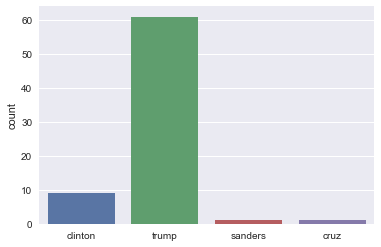

In [170]:
# Import packages
# import seaborn as sns
# import matplotlib.pyplot as plt

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot histogram
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()